<a href="https://colab.research.google.com/github/ayush-singh110/DeepLearning-ClassificationWithMultiLayerPerceptron/blob/main/Deep_Learning_ClassificationWithMultiLayerPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier
from ipywidgets import widgets
from IPython.display import display
from ipywidgets import interactive

In [ ]:
X,y=make_circles(n_samples=300,noise=0.1,factor=0.7,random_state=0)

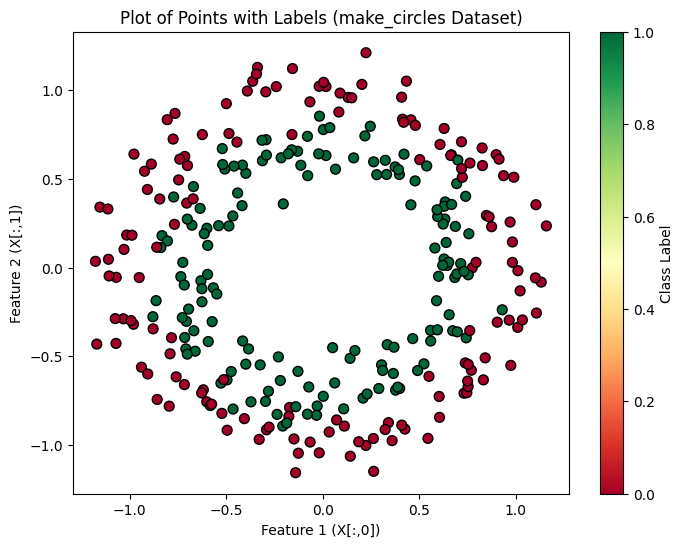

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlGn,edgecolors='k',marker='o',s=50)
plt.xlabel('Feature 1 (X[:,0])')
plt.ylabel('Feature 2 (X[:,1])')
plt.title('Plot of Points with Labels (make_circles Dataset)')
plt.colorbar(label='Class Label')
plt.show()

In [ ]:
def update_plot(hidden_layer_size):
    clf=MLPClassifier(hidden_layer_sizes=(hidden_layer_size,),
                      activation='relu',max_iter=3000,random_state=1)
    clf.fit(X,y)
    x_vals=np.linspace(X[:,0].min()-0.1,X[:,0].max()+0.1,100)
    y_vals=np.linspace(X[:,1].min()-0.1,X[:,1].max()+0.1,100)
    X_plane,Y_plane=np.meshgrid(x_vals,y_vals)
    grid_points=np.column_stack((X_plane.ravel(),Y_plane.ravel()))
    Z=clf.predict(grid_points)
    Z=Z.reshape(X_plane.shape)
    y_pred=clf.predict(X)
    plt.clf()
    plt.contourf(X_plane,Y_plane,Z,levels=[-0.5,0.5,1.5],cmap=plt.cm.RdYlGn,alpha=0.6)

    class_0=y_pred==0
    class_1=y_pred==1
    plt.scatter(X[class_0,0],X[class_0,1],c='red',edgecolors='k',marker='o',s=50,label='Predicted Class 0')
    plt.scatter(X[class_1,0],X[class_1,1],c='green',edgecolors='k',marker='o',s=50,label='Predicted Class 1')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Boundary and Predicted Labels (Hidden Layer Size={hidden_layer_size})')
    plt.legend()
    plt.show()

    hidden_layer_size_slider=widgets.IntSlider(value=1,min=1,max=10,step=1,description='Hidden Layer Size')
    interactive_plot=interactive(update_plot,hidden_layer_size=hidden_layer_size_slider)

    display(interactive_plot)